In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [57]:
hr_df = pd.read_csv("HR_comma_sep.csv")

In [58]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [59]:
X = hr_df.drop('left',axis = 1)
y = hr_df['left']


In [60]:
# train test Split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 24,test_size = 0.3,stratify=y)
# stratify -> after this results should improve if not that's coincidence
print(y_train.value_counts(normalize = True)*100)
print(y_test.value_counts(normalize = True)*100)

left
0    76.209985
1    23.790015
Name: proportion, dtype: float64
left
0    76.216937
1    23.783063
Name: proportion, dtype: float64


In [61]:
#using make_column_selector(dtype_exclude = ) & dtype_include= 
lr = LogisticRegression(multi_class = 'multinomial',random_state =24)
ohe = OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False)
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),(ohe,make_column_selector(dtype_include = object) ),verbose_feature_names_out = False).set_output(transform='pandas')
pipe = Pipeline([('CT',ct),('SCL',None),('LR',lr)])
#ct.fit_transform(hr_df)

In [62]:
pipe.fit(X_train,y_train)
y_pred_prob = pipe.predict_proba(X_test)
print(log_loss(y_test, y_pred_prob))
p_y_1 = y_pred_prob[:,1]

0.43679097722506144


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
m1spec,sens,thresholds = roc_curve(y_test,p_y_1)

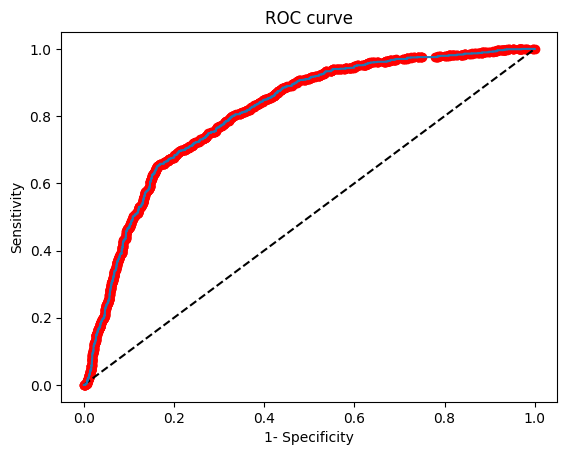

ROC_AUC_Score 0.8100274459462038


In [64]:
plt.plot([0,1],[0,1],'k--')
plt.plot(m1spec,sens)
plt.scatter(m1spec,sens,c='red')
plt.xlabel('1- Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.show()
print("ROC_AUC_Score",roc_auc_score(y_test,p_y_1))

In [65]:
kfold = StratifiedKFold(n_splits=5, random_state=24,shuffle=True)

In [66]:
scaler_mm = MinMaxScaler()
scaler_std = StandardScaler()

In [67]:
params = {'LR__solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
          'LR__C':np.linspace(0.001, 10, 20),
        'SCL':[scaler_mm,scaler_std,None]}

In [68]:
gcv = GridSearchCV(pipe, param_grid = params,scoring = 'roc_auc',cv=kfold, verbose=3)

In [69]:
gcv.fit(X,y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.783 total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.766 total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.788 total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.780 total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.797 total time=   0.0s
[CV 1/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=0.817 total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=0.804 total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=0.817 total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=0.811 total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler()

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=0.798 total time=   0.2s
[CV 2/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=0.765 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[CV 3/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=0.784 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=0.782 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=0.785 total time=   0.2s
[CV 1/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.001

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=0.808 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=0.785 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=0.804 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=0.804 total time=   0.5s
[CV 1/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=0.783 total time=   0.1s
[CV 2/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=0.766 total time=   0.1s
[CV 3/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=0.788 total time=   0.1s
[CV 4/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=0.780 total time=   0.1s
[CV 5/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=0.797 total time=   0.1s
[CV 1/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=0.817 total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=0.804 total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=0.817 total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=0.811 total time=   0.1s
[CV 5/5] END LR__C=0.001, LR__solver=saga, SCL=Standa

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=0.788 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=0.772 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=0.790 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=0.788 total time=   0.5s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=0.5272631578947369

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=0.819 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=0.826 total time=   0.2s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=0.527263157894

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=1.053

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=0.815 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=0.815 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=0.818 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=0.820 total time=   0.4s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=1.053526315789

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=1.579

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=0.819 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=0.810 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=0.818 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=1.579789473684

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=2.106

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=0.818 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=0.806 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=0.819 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=0.820 total time=   0.4s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=2.106052631578

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=2.632

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=0.816 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=0.818 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=0.811 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=0.819 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=0.818 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=0.813 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=2.632315789473

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=3.15857894736

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=0.815 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=3.158578947368421, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=3.684842105263

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=0.804 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=0.810 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=3.684842105263158, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=4.211105263157

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=4.211105263157895, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=4.737368421052

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=4.737368421052632, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=5.263631578947

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=0.818 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=0.818 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=0.820 total time=   0.4s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=5.263631578947369, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=5.789894736842

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=0.817 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=0.819 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=0.811 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=5.789894736842106, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=6.316157894736

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=0.816 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=0.806 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=0.818 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=6.316157894736842, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=6.84242105263158, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=0.817 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=6.8424

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=0.818 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=sag

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=7.3686842105263

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=0.818 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=0.820 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=7.368684210526316, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=7.894947368421

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=0.816 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=0.806 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=0.819 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=0.820 total time=   0.4s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=7.894947368421054, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=8.42121052631579, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=0.816 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=0.806 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=0.820 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=8.4212

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=sag

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=8.9474736842105

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=0.820 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=0.813 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=8.947473684210527, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=9.473736842105

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=0.807 total time=   0.2s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=0.820 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[CV 4/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=9.473736842105263, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solver=lbfg

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=0.804 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=0.820 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solve

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=0.812 total time=   0.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib

[CV 5/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AA3CDF560>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn....
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01]),
                         'LR__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga'],
                         'SCL': [MinMaxScaler(), StandardScaler(), None]},
             scoring='roc_auc', verbose=3)

In [70]:
print(gcv.best_params_)
print(gcv.best_score_)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(pd_cv.shape)


{'LR__C': 0.5272631578947369, 'LR__solver': 'newton-cg', 'SCL': None}
0.8200853112429177
(360, 16)


In [77]:
gcv = GridSearchCV(pipe, param_grid = params,scoring = 'neg_log_loss',cv=kfold, verbose=3)

In [79]:
gcv.fit(X,y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.500 total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.503 total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.499 total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.501 total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.497 total time=   0.0s
[CV 1/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.439 total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.448 total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.438 total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.443 total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__solver=lbfgs, SCL=Standar

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=-0.491 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=-0.499 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=-0.495 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=-0.496 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=-0.495 total time=   0.2s
[CV 1/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.00

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=-0.494 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=-0.499 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=-0.494 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=-0.495 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=-0.496 total time=   0.5s
[CV 1/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=-0.500 total time=   0.1s
[CV 2/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=-0.503 total time=   0.1s
[CV 3/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=-0.499 total time=   0.1s
[CV 4/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=-0.501 total time=   0.1s
[CV 5/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=-0.497 total time=   0.1s
[CV 1/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=-0.439 total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=-0.448 total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=-0.438 total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=-0.443 total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__solver=saga, 

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=-0.499 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=-0.503 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=-0.498 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=-0.498 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=-0.500 total time=   0.5s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=0.5272631

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=-0.432 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=-0.441 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=-0.426 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=-0.427 total time=   0.2s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=0.527

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=-0.464 total time=   0.5s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=-0.431 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=-0.441 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=-0.427 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=1.053

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=-0.464 total time=   0.5s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=-0.431 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=-0.441 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=-0.425 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=1.579

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=-0.464 total time=   0.5s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=-0.428 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=-0.440 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=-0.425 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=2.106

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=-0.440 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=-0.426 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=2.632

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=3.15

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=-0.431 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=-0.440 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=-0.428 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=3.158578947368

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=3.684

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=-0.431 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=-0.441 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=-0.433 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=-0.435 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=3.684842105263

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=4.211

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=-0.431 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=-0.441 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=-0.428 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=4.211105263157

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=4.737

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=-0.431 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=-0.440 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=4.737368421052

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=5.263

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=-0.431 total time=   0.1s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=-0.441 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=-0.426 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=-0.430 total time=   0.2s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=5.263631578947

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=5.789

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=-0.435 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=-0.441 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=-0.426 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=-0.435 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=-0.439 total time=   0.1s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=5.789894736842

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=6.316

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=-0.430 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=-0.441 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=-0.426 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=6.316157894736

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.439 total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=6.84242105263

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=-0.431 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=-0.440 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=-0.426 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=6.842

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=6.84242105263158, LR__s

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=7.3686

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=-0.428 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=-0.440 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=-0.425 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=7.368684210526

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=7.894

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=-0.430 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=-0.440 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=-0.425 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=-0.430 total time=   0.2s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=7.894947368421

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=8.42121052631

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=-0.430 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=-0.440 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=-0.425 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=8.421

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=8.42121052631579, LR__s

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=8.9474

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=-0.431 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=-0.441 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=-0.425 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=8.947473684210

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=9.473

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=-0.432 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=-0.440 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=-0.425 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=9.473736842105

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s
[CV 1/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=-0.427 total time=   0.0s
[CV 1/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.427 total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.423 total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=-0.433 total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__s

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=-0.432 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=-0.441 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=-0.425 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=-0.434 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=-0.429 total time=   0.2s
[CV 1/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solv

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=-0.453 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=-0.447 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=-0.443 total time=   0.5s
[CV 1/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=-0.440 total time=   0.1s
[CV 3/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=-0.427 total time=   0.1s
[CV 1/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=-0.427 total time=   0.1s
[CV 2/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=-0.440 total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=-0.423 total time=   0.1s
[CV 4/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=-0.433 total time=   0.1s
[CV 5/5] END LR__C=10.0, LR__solver=saga, SCL=Standar

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=-0.471 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=-0.465 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib

[CV 5/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=-0.463 total time=   0.5s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AA3CDF560>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn....
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01]),
                         'LR__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga'],
                         'SCL': [MinMaxScaler(), StandardScaler(), None]},
             scoring='neg_log_loss', verbose=3)

In [80]:
print(gcv.best_params_)
print(gcv.best_score_)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(pd_cv.shape)


{'LR__C': 4.211105263157895, 'LR__solver': 'newton-cg', 'SCL': None}
-0.42982935989021165
(360, 16)
